<h1 style="color:#1a237e; background-color:#ffeb3b; padding:10px; border-radius:5px; text-align:center;text-shadow: 2px 2px 5px rgba(0,0,0,0.5);">
   Blinkit Sales Analysis – Data Cleaning & Preprocessing
</h1>


<div style="background-color:#1e1e2f; color:white; padding:15px; border-radius:10px; font-size:16px;">

  <h2 style="color:#ffcc00;">🚀 Overview</h2>

  <p>
    This notebook focuses on <b>data cleaning and preprocessing</b> for the 
    <b>Blinkit Sales Dataset</b>.  
    The dataset contains grocery sales transactions including product details, 
    quantities, prices, customer information, order dates, and delivery status.
  </p>

  <p>
    The goal of this step is to ensure the dataset is ready for analysis and visualization by:
  </p>

  <ul>
    <li>Handling missing values and duplicates</li>
    <li>Standardizing column names and data types</li>
    <li>Preparing a clean version of the dataset for EDA and Power BI dashboards</li>
  </ul>

</div>
  </ul>

</div>


<div style="background-color:#1e1e2f; color:white; padding:15px; border-radius:10px; font-size:16px;">

  <h2 style="color:#ff6600;">📊 Analysis Questions</h2>

  <ul style="line-height:1.8;">
    <li>Which products or categories have shown a decline in sales performance?</li>
    <li>Are there specific times of the day or days of the week when sales decrease?</li>
    <li>What percentage of orders were delayed beyond the promised delivery time?  
        And is there a relationship between delays and customer satisfaction or repeat purchases?</li>
  </ul>

</div>


<h1 style="color:lightGreen; font-size:32px; font-weight:bold; background-color:#1C1C1C;padding:10px; border-radius:8px;">Importing Required Libraries</h1>

##### <span style="color:orange">Importing required libraries means loading external Python libraries into your script or notebook so you can use their functions and tools.

In [1]:
# Pandas
import pandas as pd
#matplotlib
import matplotlib.pyplot as plt
# to display Matplotlib plots directly
%matplotlib inline 
# Seaborn 
import seaborn as sns

<h1 style="color:lightGreen; font-size:32px; font-weight:bold; background-color:#1C1C1C;padding:10px; border-radius:8px;">Loading the Dataset</h1>

##### <span style="color:orange"> importing data from an external file (such as CSV, Excel, JSON, or SQL) into a Pandas DataFrame so it can be analyzed and processed using Python. 

In [2]:
# Orders Table
orders = pd.read_csv('blinkit_orders.csv')
# Products Table
products = pd.read_csv('blinkit_products.csv')
# order_items Table
order_items = pd.read_csv('blinkit_order_items.csv')
# Customers Table
customers = pd.read_csv('blinkit_customers.csv')

<h2 style="color:skyblue; font-size:30px; font-weight:bold; background-color:#2a2a2a; padding:8px; border-radius:6px;">
1-
📂 Orders Table
</h2>


<h1 style="color:lightGreen; font-size:25px; font-weight:bold; background-color:#1C1C1C;padding:10px; border-radius:8px;">Exploring the Data</h1>

##### <span style="color:orange"> examining the dataset to understand its structure, quality, and key characteristics before performing analysis.

In [3]:
# Show The first 5 raws
orders.head(5)

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


In [4]:
# Check data types and missing values
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   order_date              5000 non-null   object 
 3   promised_delivery_time  5000 non-null   object 
 4   actual_delivery_time    5000 non-null   object 
 5   delivery_status         5000 non-null   object 
 6   order_total             5000 non-null   float64
 7   payment_method          5000 non-null   object 
 8   delivery_partner_id     5000 non-null   int64  
 9   store_id                5000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 390.8+ KB


In [5]:
# Description of the data
orders.describe()

,order_id,customer_id,order_total,delivery_partner_id,store_id
count,5.000000e+03,5.000000e+03,5000.00000,5000.000000,5000.000000
mean,5.029129e+09,5.009685e+07,2201.86170,50050.318200,4999.689000
std,2.863533e+09,2.919082e+07,1303.02438,28802.276922,2886.089242
min,6.046500e+04,3.181300e+04,13.25000,43.000000,1.000000
25%,2.531421e+09,2.404314e+07,1086.21500,24928.500000,2509.250000
50%,5.074378e+09,4.997808e+07,2100.69000,50262.500000,4987.000000
75%,7.488579e+09,7.621215e+07,3156.88250,74478.250000,7500.750000
max,9.998298e+09,9.989390e+07,6721.46000,99968.000000,9995.000000


In [6]:
# Checks For Missing Values
orders.isnull().sum()

order_id                  0
customer_id               0
order_date                0
promised_delivery_time    0
actual_delivery_time      0
delivery_status           0
order_total               0
payment_method            0
delivery_partner_id       0
store_id                  0
dtype: int64

In [7]:
# Check for Duplicated Value in primary Key (order_id)
orders['order_id'].duplicated().sum()

0

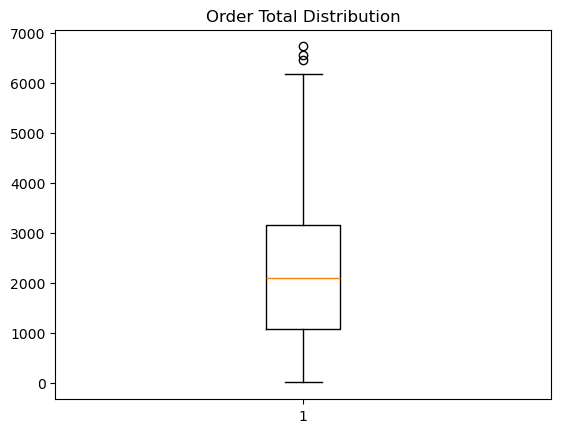

In [8]:
plt.boxplot(orders['order_total'])
plt.title("Order Total Distribution")
plt.show()

In [9]:
print(orders['payment_method'].unique())
print(orders['delivery_status'].unique())

['Cash' 'UPI' 'Card' 'Wallet']
['On Time' 'Slightly Delayed' 'Significantly Delayed']


<h1 style="color:#00274D; background-color:#FFD700; padding:10px; border-radius:8px;">
    📌 Featureset Exploration
</h1>
<ul style="color:#00FF7F; font-weight:bold; background-color:#2F2F2F; padding:20px; border-radius:5px;"> <b>
    <li>order_id : Nominal  [Note : Must be object]</li>
    <li>customer_id	 : Nominal [Note : Must be object]</li>
    <li>order_Date : Date Time [Note : Must be Date Time] </li>
    <li>promised_delivery_time : Date Time [Note : Must be Date Time]</li>
    <li>actual_delivery_time : Date Time [Note : Must be Date Time]</li>
    <li>delivery_status : Nominal</li>
    <li>order_total : Ratio</li>
    <li>payment_method : Nominal</li>
    <li>delivery_partner_id : Nominal  [Note : Must be object]</li>
    <li>store_id : Nominal  [Note : Must be object]</li>
</ul>


<h1 style="color:lightGreen; font-size:25px; font-weight:bold; background-color:#1C1C1C;padding:10px; border-radius:8px;">Data Cleaning</h1>

##### <span style="color:orange"> is the process of identifying and correcting errors in a dataset to improve its quality and reliability. 

<ul style="color:#FF6347; font-weight:bold; background-color:#2F2F2F; padding:20px; border-radius:5px;"><b> 
    <li>Data Type Conversion</li>
 </ul>

In [10]:
# Backing Up Data
orders_clean = orders.copy()
orders_clean.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


<h3 style="color:#FF6347; font-size:22px; font-weight:bold; background-color:#2F2F2F; padding:5px; border-radius:5px;"">Data Type Conversion</h3>

##### <span style="color:orange"> Data Type Conversion refers to the process of changing the data type of a variable or column in a dataset to another type. 

<h3 style="color:#FF6347; font-size:22px;"> 1. order_id (From int to object)</h3>

In [11]:
orders_clean['order_id'] = orders_clean['order_id'].astype('object')

<h3 style="color:#FF6347; font-size:22px;"> 2. Customer_id (From int to object)</h3>

In [12]:
orders_clean['customer_id'] = orders_clean['customer_id'].astype('object')

<h3 style="color:#FF6347; font-size:22px;"> 3. order_date (From object to Date Time)</h3>

In [13]:
orders_clean['order_date'] = pd.to_datetime(orders_clean['order_date'])

<h3 style="color:#FF6347; font-size:22px;"> 4. promised_delivery_time (From object to Date Time)</h3>

In [14]:
orders_clean['promised_delivery_time'] = pd.to_datetime(orders_clean['promised_delivery_time'])

<h3 style="color:#FF6347; font-size:22px;"> 5. actual_delivery_time (From object to Date Time)</h3>

In [15]:
orders_clean['actual_delivery_time'] = pd.to_datetime(orders_clean['actual_delivery_time'])

<h3 style="color:#FF6347; font-size:22px;"> 6. delivery_partner_id  (From int to object)</h3>

In [16]:
orders_clean['delivery_partner_id'] = orders_clean['delivery_partner_id'].astype('object')

<h3 style="color:#FF6347; font-size:22px;"> 7. store_id (From int to object)</h3>

In [17]:
orders_clean['store_id'] = orders_clean['store_id'].astype('object')

In [18]:
orders_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                5000 non-null   object        
 1   customer_id             5000 non-null   object        
 2   order_date              5000 non-null   datetime64[ns]
 3   promised_delivery_time  5000 non-null   datetime64[ns]
 4   actual_delivery_time    5000 non-null   datetime64[ns]
 5   delivery_status         5000 non-null   object        
 6   order_total             5000 non-null   float64       
 7   payment_method          5000 non-null   object        
 8   delivery_partner_id     5000 non-null   object        
 9   store_id                5000 non-null   object        
dtypes: datetime64[ns](3), float64(1), object(6)
memory usage: 390.8+ KB


In [19]:
# Save File 'orders Cleaned'
orders_clean.to_csv('blinkit_orders_cleaned.csv',index = False)

<h2 style="color:skyblue; font-size:30px; font-weight:bold; background-color:#2a2a2a; padding:8px; border-radius:6px;">
2-
📂 products Table
</h2>

<h1 style="color:lightGreen; font-size:25px; font-weight:bold; background-color:#1C1C1C;padding:10px; border-radius:8px;">Exploring the Data</h1>

In [20]:
products.head()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55


In [21]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         268 non-null    int64  
 1   product_name       268 non-null    object 
 2   category           268 non-null    object 
 3   brand              268 non-null    object 
 4   price              268 non-null    float64
 5   mrp                268 non-null    float64
 6   margin_percentage  268 non-null    float64
 7   shelf_life_days    268 non-null    int64  
 8   min_stock_level    268 non-null    int64  
 9   max_stock_level    268 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 21.1+ KB


In [22]:
products.describe()

,product_id,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,514855.940299,488.356828,680.434739,27.779851,231.757463,20.388060,74.753731
std,291391.529820,298.487200,419.772224,7.458753,151.205830,5.958546,14.591535
min,4452.000000,12.320000,17.600000,15.000000,3.000000,10.000000,50.000000
25%,273697.750000,226.717500,325.150000,20.000000,90.000000,15.000000,63.750000
50%,541459.000000,442.185000,616.970000,30.000000,365.000000,21.000000,73.000000
75%,754334.000000,779.445000,1056.620000,35.000000,365.000000,25.250000,88.000000
max,993331.000000,995.980000,1633.320000,40.000000,365.000000,30.000000,100.000000


In [23]:
products.isnull().sum()

product_id           0
product_name         0
category             0
brand                0
price                0
mrp                  0
margin_percentage    0
shelf_life_days      0
min_stock_level      0
max_stock_level      0
dtype: int64

In [24]:
products['product_id'].duplicated().sum()

0

<h1 style="color:#00274D; background-color:#FFD700; padding:10px; border-radius:8px;">
    📌 Featureset Exploration
</h1>
<ul style="color:#00FF7F; font-weight:bold; background-color:#2F2F2F; padding:20px; border-radius:5px;"> <b>
    <li>product_id : Nominal  [Note : Must be object]</li>
    <li>product_name : Nominal </li>
    <li>category : Nominal</li>
    <li>brand : Nominal</li>
    <li>price : Ratio</li>
    <li>mrp : Ratio</li>
    <li>margin_percentage : Ratio</li>
    <li>shelf_life_days : Ratio</li>
    <li>min_stock_level : Ratio</li>
    <li>max_stock_level : Ratio</li>
</ul>


<h1 style="color:lightGreen; font-size:25px; font-weight:bold; background-color:#1C1C1C;padding:10px; border-radius:8px;">Data Cleaning</h1>

<ul style="color:#FF6347; font-weight:bold; background-color:#2F2F2F; padding:20px; border-radius:5px;"><b> 
    <li>Data Type Conversion</li>
 </ul>

In [25]:
products_clean = products.copy()
products_clean.head()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55


<h3 style="color:#FF6347; font-size:22px;"> product-id (From int to object)</h3>

In [26]:
products_clean['product_id'] = products_clean['product_id'].astype('object')

In [27]:
products_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         268 non-null    object 
 1   product_name       268 non-null    object 
 2   category           268 non-null    object 
 3   brand              268 non-null    object 
 4   price              268 non-null    float64
 5   mrp                268 non-null    float64
 6   margin_percentage  268 non-null    float64
 7   shelf_life_days    268 non-null    int64  
 8   min_stock_level    268 non-null    int64  
 9   max_stock_level    268 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 21.1+ KB


In [28]:
# Save File 'Products_cleaned'
products_clean.to_csv('blinkit_products_cleaned.csv',index = False)

<h2 style="color:skyblue; font-size:30px; font-weight:bold; background-color:#2a2a2a; padding:8px; border-radius:6px;">
3-
📂 order_items Table
</h2>


<h1 style="color:lightGreen; font-size:25px; font-weight:bold; background-color:#1C1C1C;padding:10px; border-radius:8px;">Exploring the Data</h1>

In [29]:
order_items.head(5)

,order_id,product_id,quantity,unit_price
0,1961864118,642612,3,517.03
1,1549769649,378676,1,881.42
2,9185164487,741341,2,923.84
3,9644738826,561860,1,874.78
4,5427684290,602241,2,976.55


In [30]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    5000 non-null   int64  
 1   product_id  5000 non-null   int64  
 2   quantity    5000 non-null   int64  
 3   unit_price  5000 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 156.4 KB


In [31]:
order_items.describe()

,order_id,product_id,quantity,unit_price
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,5.029129e+09,509974.939600,2.006800,493.157900
std,2.863533e+09,293678.307475,0.820542,298.075647
min,6.046500e+04,4452.000000,1.000000,12.320000
25%,2.531421e+09,257719.000000,1.000000,227.220000
50%,5.074378e+09,540618.000000,2.000000,448.160000
75%,7.488579e+09,747801.000000,3.000000,781.080000
max,9.998298e+09,993331.000000,3.000000,995.980000


In [32]:
order_items.isnull().sum()

order_id      0
product_id    0
quantity      0
unit_price    0
dtype: int64

In [33]:
print(order_items['order_id'].duplicated().sum())

0


<h1 style="color:#00274D; background-color:#FFD700; padding:10px; border-radius:8px;">
    📌 Featureset Exploration
</h1>
<ul style="color:#00FF7F; font-weight:bold; background-color:#2F2F2F; padding:20px; border-radius:5px;"> <b>
    <li>order_id : Nominal  [Note : Must be object]</li>
    <li>product_id : Nominal [Note : Must be object]</li>
    <li>quantity : Ratio</li>
    <li>unit_price : Ratio</li>
</ul>


<h1 style="color:lightGreen; font-size:25px; font-weight:bold; background-color:#1C1C1C;padding:10px; border-radius:8px;">Data Cleaning</h1>

In [34]:
order_items_clean = order_items.copy()
order_items_clean.head()

,order_id,product_id,quantity,unit_price
0,1961864118,642612,3,517.03
1,1549769649,378676,1,881.42
2,9185164487,741341,2,923.84
3,9644738826,561860,1,874.78
4,5427684290,602241,2,976.55


<ul style="color:#FF6347; font-weight:bold; background-color:#2F2F2F; padding:20px; border-radius:5px;"><b> 
    <li>Data Type Conversion</li>
 </ul>

<h3 style="color:#FF6347; font-size:22px;"> order_id (From int to object)</h3>

In [35]:
order_items_clean['order_id'] = order_items_clean['order_id'].astype('object')

<h3 style="color:#FF6347; font-size:22px;"> product-id (From int to object)</h3>

In [36]:
order_items_clean['product_id'] = order_items_clean['product_id'].astype('object')

In [37]:
order_items_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    5000 non-null   object 
 1   product_id  5000 non-null   object 
 2   quantity    5000 non-null   int64  
 3   unit_price  5000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 156.4+ KB


In [38]:
# Save File 'order_items_cleaned'
order_items_clean.to_csv('blinkit_order_items_cleaned.csv',index = False)

<h2 style="color:skyblue; font-size:30px; font-weight:bold; background-color:#2a2a2a; padding:8px; border-radius:6px;">
4-
📂 Customers Table
</h2>


<h1 style="color:lightGreen; font-size:25px; font-weight:bold; background-color:#1C1C1C;padding:10px; border-radius:8px;">Exploring the Data</h1>


In [39]:
customers.head(5)

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14


In [40]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        2500 non-null   int64  
 1   customer_name      2500 non-null   object 
 2   email              2500 non-null   object 
 3   phone              2500 non-null   int64  
 4   address            2500 non-null   object 
 5   area               2500 non-null   object 
 6   pincode            2500 non-null   int64  
 7   registration_date  2500 non-null   object 
 8   customer_segment   2500 non-null   object 
 9   total_orders       2500 non-null   int64  
 10  avg_order_value    2500 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 215.0+ KB


In [41]:
customers.describe()

,customer_id,phone,pincode,total_orders,avg_order_value
count,2.500000e+03,2.500000e+03,2500.000000,2500.000000,2500.000000
mean,4.989961e+07,9.150532e+11,497653.183200,10.491600,1102.375836
std,2.919266e+07,2.882835e+09,281167.293249,5.805533,523.043183
min,3.181300e+04,9.100132e+11,666.000000,1.000000,200.430000
25%,2.402443e+07,9.125946e+11,257079.750000,6.000000,631.817500
50%,5.000044e+07,9.150236e+11,498662.000000,10.000000,1118.650000
75%,7.595459e+07,9.176256e+11,740668.000000,16.000000,1565.400000
max,9.989390e+07,9.199988e+11,999631.000000,20.000000,1999.830000


In [42]:
customers.isnull().sum()

customer_id          0
customer_name        0
email                0
phone                0
address              0
area                 0
pincode              0
registration_date    0
customer_segment     0
total_orders         0
avg_order_value      0
dtype: int64

In [43]:
customers['customer_id'].duplicated().sum()

0

<h1 style="color:lightGreen; font-size:25px; font-weight:bold; background-color:#1C1C1C;padding:10px; border-radius:8px;">Data Cleaning</h1>

In [44]:
customers_clean = customers.copy()
customers_clean.head(5)

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14


<ul style="color:#FF6347; font-weight:bold; background-color:#2F2F2F; padding:20px; border-radius:5px;"><b> 
    <li>Data Type Conversion</li>
 </ul>

<h3 style="color:#FF6347; font-size:22px;"> 1.Customer_id (From int to object)</h3>

In [45]:
customers_clean['customer_id'] = customers_clean['customer_id'].astype('object')

<h3 style="color:#FF6347; font-size:22px;"> 2.Phone (From int to object)</h3>

In [46]:
customers_clean['phone'] = customers_clean['phone'].astype('object')

<h3 style="color:#FF6347; font-size:22px;"> 3.pincode (From int to object)</h3>

In [47]:
customers_clean['pincode'] = customers_clean['pincode'].astype('object')

<h3 style="color:#FF6347; font-size:22px;"> 4.registration_date (From object to Date Time)</h3>

In [48]:
customers_clean['registration_date'] = pd.to_datetime(customers_clean['registration_date'])

In [49]:
customers_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        2500 non-null   object        
 1   customer_name      2500 non-null   object        
 2   email              2500 non-null   object        
 3   phone              2500 non-null   object        
 4   address            2500 non-null   object        
 5   area               2500 non-null   object        
 6   pincode            2500 non-null   object        
 7   registration_date  2500 non-null   datetime64[ns]
 8   customer_segment   2500 non-null   object        
 9   total_orders       2500 non-null   int64         
 10  avg_order_value    2500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 215.0+ KB


In [50]:
# Save File 'Customers_Cleaned'
customers_clean.to_csv('blinkit_customers_cleaned.csv',index = False)